# Break Through Tech ML Foundations Final Project - Music Genre Classification

## About This Project

This project builds and compares two machine learning models (Traditional Neural Network and Convolutional Neural Network) for music genre classification. 

The dataset used to train the model for this project was created from the GTZAN dataset, which contains 1000 30-second .wav files, each containing a song clip. The song clips are categorized into folders by genre. This GTZAN dataset was pre-processed and exported to a .json file (data.json) in order to be used as input for the machine learning models. The pre-processing step was done in a separate jupyter notebook called 'Pre-ProcessGTZANforGenreClassification.ipynb'. This pre-processing notebook contains explanatory information about the pre-processing stage as well as information about Mel Frequency Cepstral Coefficients (MFCC's), which will be the primary input for the machine learning model.


#### For convenience, here is a brief overview of the pre-processing stage:
- Create an empty dictionary which will be used to hold semantic labels aka a string for each genre ("mapping" key), numerical labels corresponding to each genre for each audio segment ("label" key), and mfccs for each audio segment ("mfcc" key).
- Loop through all the genre folders. For each genre, add a string of the genre to the values list that corresponds to the "mapping" key.
- Within each genre folder, loop through the .wav files.
- For each .wav file, break the song into multiple segments. Ten segments is chosen for this project. This is done to create more data.
- Calculate MFCCs for each segment. In this case, there are 130 MFCC vectors per segment (this is determined by the number of samples per segment divided by the hop-length). Each MFCC vector within each segment contains 13 coefficients (this is determined by the parameter n_mfcc). This creates a 130 x 13 2d array for each segment.
- Append the MFCC array to the list of values corresponding to the "mfcc" dictionary key
- Append a numerical representation of the label to the list of values corresponding to the "label" dictionary key.
- Exit all of the above loops and dump the dictionary into a .json file.

The pre-processing notebook, the data.json file, and the GTZAN dataset can all be found in the main project folder (the same folder this jupyter notebook is in).

## Acknowledgements

This project has been created by following along with the tutorials from the first 16 videos in the Youtube series "Deep Learning (for Audio) with Python" by creator Velerio Velardo - The Sound of AI: https://www.youtube.com/playlist?list=PL-wATfeyAMNrtbkCNsLcpoAyBBRJZVlnf

The GTZAN dataset can be found here: https://www.kaggle.com/datasets/andradaolteanu/gtzan-dataset-music-genre-classification

#### This project follows the machine learning life cycle and implements a model to classify the genre of a given song.

The machine learning lifecycle includes the following stages:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

import librosa, librosa.display
import json
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
from keras.layers import Input

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2" # suppress info and warning messages

## Part 1: Build Your DataFrame

In [2]:
DATASET_PATH = os.path.join(os.getcwd(), "Data", "data.json")

def load_data(dataset_path):
    with open(dataset_path, "r") as fp:
        data = json.load(fp)

        # convertlists into numpy arrays
        X = np.array(data["mfcc"])
        y = np.array(data["labels"])
        mapping = np.array(data["mapping"])

        return X, y, mapping

if __name__ == "__main__":
    X, y, mapping = load_data(DATASET_PATH)

## Part 2: Define Your ML Problem

I've chosen the GTZAN dataset which contains .wav files of songs and genre information. This dataset has been pre-processed to break each .wav file into 10 segments, extract MFCCs for each segment, and export MFCCs and label information for each segment into a .json file.
I will be predicting the genre of a given song. The genre will be the label. 
This is a supervised learning multi-class classification problem.
My features are MFCC vectors, which are commonly used for audio machine learning tasks.
This problem is important because it can be used in music recommendation systems to offer relevant music content to consumers based on their listening history and liked songs.

## Part 3: Understand Your Data

As mentioned above, the data for this model was created in the notebook 'Pre-ProcessGTZANforGenreClassification.ipynb'. For a more detailed overview and analysis of the data, refer to that notebook. The cells below will show the shape, datatype, and a preview of the features and labels.

In [3]:
print(X.shape)
print(X)
print(X.dtype)

(9986, 130, 13)
[[[-2.18336304e+02  1.38975708e+02  1.10363693e+01 ... -1.68071766e+01
   -5.64757919e+00 -2.47110214e+01]
  [-2.00653473e+02  1.35442368e+02  5.92790604e+00 ... -1.35357590e+01
   -8.52425957e+00 -1.89409103e+01]
  [-1.99912170e+02  1.30874451e+02 -1.45605373e+00 ... -1.98667755e+01
   -9.98987675e+00 -8.78959942e+00]
  ...
  [ 3.11111469e+01  6.05689545e+01  1.95401077e+01 ... -5.87557507e+00
   -1.29760628e+01 -3.89030170e+00]
  [ 4.58396721e+01  6.10874710e+01  1.55057373e+01 ... -8.06866074e+00
   -1.02450047e+01 -2.65552950e+00]
  [ 9.01888561e+00  6.09232368e+01  7.21001339e+00 ... -2.91970992e+00
   -5.54147625e+00  1.10607886e+00]]

 [[-2.47325363e+01  6.03365860e+01 -1.56957281e+00 ...  4.50840092e+00
   -3.60409927e+00 -6.81442738e-01]
  [ 2.96414995e+00  5.68857880e+01 -1.00340147e+01 ...  8.15439045e-01
   -1.10899181e+01 -9.09393501e+00]
  [-1.56709490e+01  6.03238831e+01 -1.84312744e+01 ... -3.06232715e+00
   -1.51068182e+01 -1.83321342e+01]
  ...
  [-9.4

In [4]:
print(y.shape)
print(y)
print(y.dtype)

(9986,)
[0 0 0 ... 9 9 9]
int64


In [5]:
print(mapping.shape)
print(mapping)
print(mapping.dtype)

(10,)
['pop' 'metal' 'disco' 'blues' 'reggae' 'classical' 'rock' 'hiphop'
 'country' 'jazz']
<U9


## Part 4: Define Project Plan

The features will be MFCCs due to the nature of the problem and the intention to use a Convolutional Neural Network.

The data has been prepared during the pre-processing stage which was done in the 'Pre-ProcessGTZANforGenreClassification.ipynb' notebook. Each sound clip was split into 10 segments and MFCCs were extracted for each segment. The MFCCs and corresponding labels (both numerical and mapped semantic labels) were added to a dictionary, which was then exported to a .json file.

A traditional neural network will first be implemented, then compared to a Convolutional Neural Network (CNN).

The models will be built, accuracy and loss will be evaluated, plots will display these metrics, then hyperparameters and techniques to reduce overfitting will be applied as seen fit.

## Part 5: Implement Project Plan

### Build a Traditional Neural Network

#### Split Into Training and Test Datasets

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1234)

#### Create & Define Model

In [7]:
# build model architecture

l2reg = keras.regularizers.l2(0.001)

model = keras.Sequential([
    # input layer
    Input(shape=(X.shape[1], X.shape[2])),
    keras.layers.Flatten(),

    # 1st hidden layer
    keras.layers.Dense(512, activation="relu", kernel_regularizer=l2reg),
    keras.layers.Dropout(0.3),

    # 2nd hidden layer
    keras.layers.Dense(256, activation="relu", kernel_regularizer=l2reg),
    keras.layers.Dropout(0.3),

    # 3rd hidden layer
    keras.layers.Dense(64, activation="relu", kernel_regularizer=l2reg),
    keras.layers.Dropout(0.3),

    # output layer
    keras.layers.Dense(10, activation="softmax")
])

# define optimizer
optimizer = keras.optimizers.Adam(learning_rate=.0001) #Adam is similar to SGD

# compile model
model.compile(optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# print summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 1690)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       865,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,014,218 (3.87 MB)

 Trainable params: 1,014,218 (3.87 MB)

 Non-trainable params: 0 (0.00 B)

#### Train Model
Note: The cell below may take some 

In [8]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=100)

Epoch 1/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1317 - loss: 43.7919 - val_accuracy: 0.1762 - val_loss: 3.4801
Epoch 2/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1595 - loss: 7.4375 - val_accuracy: 0.1188 - val_loss: 3.4905
Epoch 3/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1344 - loss: 4.7756 - val_accuracy: 0.1168 - val_loss: 3.4926
Epoch 4/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1291 - loss: 4.0040 - val_accuracy: 0.1232 - val_loss: 3.4831
Epoch 5/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1466 - loss: 3.7889 - val_accuracy: 0.1375 - val_loss: 3.4606
Epoch 6/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1507 - loss: 3.6639 - val_accuracy: 0.1622 - val_loss: 3.4209
Epoch 7/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1484 - loss: 3.6008 - val_accuracy: 0.1916 - val_loss: 3.3698
Epoch 8/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1621 - loss: 3.5093 - val_acc

#### Visualize Accuracy and Loss

In [9]:
def plot_history(history):
    fig, axs = plt.subplots(2)

    # create accuracy subplot
    axs[0].plot(history.history["accuracy"], label="Train Accuracy")
    axs[0].plot(history.history["val_accuracy"], label="Test Accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy Evaluation")

    # create error subplot
    axs[1].plot(history.history["loss"], label="Train Error")
    axs[1].plot(history.history["val_loss"], label="Test Error")
    axs[1].set_xlabel("Epoch")
    axs[1].set_ylabel("Error")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error Evaluation")

    plt.tight_layout()
    
    plt.show()

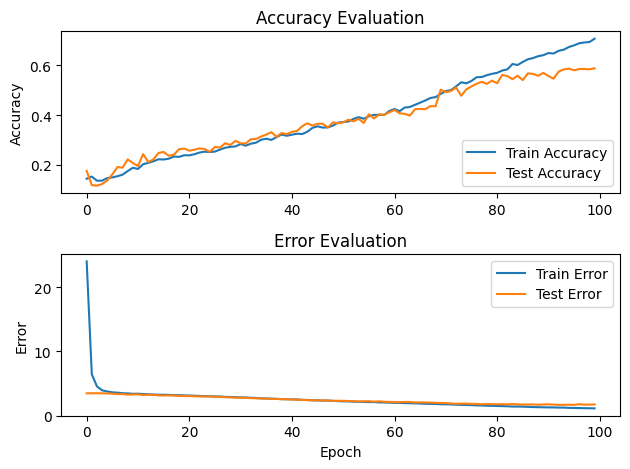

In [10]:
plot_history(history)

#### Address Overfitting
Some techniques that can be used to address overfitting:
- Use simpler model architecture
- Audio data augmentation (artificially increase # of training samples and/or apply transformations to audio files such as pitch shifting, time stretching, adding background noise, etc.)
- Early stopping in training
- Dropout (randomly drop neurons during training, typically using values for probability of dropout ranging from 0.1 to 0.5)
- Regularization (add penalty to error function, punish large weights using either L1 or L2 regularization. For most audio ML tasks, L2 is better.)

Initially, the model did not use dropout or regularization techniques. After 50 epochs, the test and training accuracy and loss were: <br>
accuracy: 0.9575 - loss: 0.1290 - val_accuracy: 0.5838 - val_loss: 2.5119

Next, dropout and regularization was added and the values were <br>
accuracy: 0.3631 - loss: 2.3249 - val_accuracy: 0.3635 - val_loss: 2.3709

Due to the shape of the performance evaluation graphs, the number of epochs was increased to 100. The evaluation metrics were: <br>
accuracy: 0.6813 - loss: 1.1724 - val_accuracy: 0.5898 - val_loss: 1.7696

Based on the shape of the evaluation plot, it appears that not much improvent on the test set is gained after about 70 epochs. Around 70 epochs is also where the model begins to overfit. At 70 epochs, the evaluation metrics were: <br>
accuracy: 0.5430 - loss: 1.6714 - val_accuracy: 0.5350 - val_loss: 1.8201

Note: Each time the code is re-run, the evaluation metrics may vary due to the random dropout.

Adding dropout and regularization and adjusting the number of epochs addresses overfitting, however execution is slow and performance still is not great. Next, a Convolutional Neural Network will be built and performance with the tradional neural network will be compared to the Convolutional Neural Network. Additionally, a validation set will be used in addition to a training and test set in order to obtain a more accurate evaluation of model performance.

### Build a Convolutional Neural Network

#### Define Function to Prepare Training, Validation, and Testing Datasets

In [11]:
def prepare_datasets(X, y, test_size=0.25, validation_size=0.2):
    # create train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1234)

    # create train/validation split
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size, random_state=1234)

    # reshape 3d array to 4d array: (num_samples, 130, 13) -> (num_samples, 130, 13, 1)
    X_train = X_train[..., np.newaxis]
    X_validation = X_validation[..., np.newaxis]
    X_test = X_test[..., np.newaxis]

    return X_train, X_validation, X_test, y_train, y_validation, y_test

#### Define Function to Build the CNN Model

In [12]:
def build_cnn_model(input_shape):
    model = keras.Sequential()

    # Input layer
    model.add(keras.layers.Input(shape=input_shape))
    
    # 1st convolutional layer
    model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
    model.add(keras.layers.MaxPool2D((3,3), strides=(2,2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # 2nd convolutional layer
    model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
    model.add(keras.layers.MaxPool2D((3,3), strides=(2,2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # 3rd convolutional layer
    model.add(keras.layers.Conv2D(32, (2,2), activation='relu'))
    model.add(keras.layers.MaxPool2D((2,2), strides=(2,2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # flatten the output and feed it into dense layer
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.3))

    # output layer
    model.add(keras.layers.Dense(10, activation='softmax'))

    return model

#### Define Function To Make a Prediction For a Particular Example Song

In [13]:
def predict(model, X_example, y_example, mapping):

    # change shape of X_example from (130, 13, 1) to (1, 130, 13, 1)
    X_example = X_example[np.newaxis, ...]    
    
    prediction = model.predict(X_example)

    # prediction is a 2d array of probability values for each label ex: [ [0.1, 0.2, ...] ]
    # extract index with max value from 2nd dimension of prediction
    predicted_index = np.argmax(prediction, axis=1)

    # get predicted and expected mapped genre labels
    expected_mapped_genre = mapping[y_example]
    predicted_mapped_genre = mapping[predicted_index]

    print(f"Expected index: {y_example}, Predicted index: {predicted_index}")
    print(f"Expected genre: {expected_mapped_genre}, Predicted genre: {predicted_mapped_genre}")
    

#### Create and Examine Training, Validation, and Testing Datasets

In [14]:
X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(X, y, test_size = 0.25, validation_size=0.2)

In [15]:
# examine shapes of train, test, and validation datasets

print(f"X_train -      shape: {X_train.shape}\tdatatype: {X_train.dtype}")
print(f"y_train -      shape: {y_train.shape}\t\tdatatype: {y_train.dtype}")
print(f"X_test  -      shape: {X_test.shape}\tdatatype: {X_test.dtype}")
print(f"y_test  -      shape: {y_test.shape}\t\tdatatype: {y_test.dtype}")
print(f"X_validation - shape: {X_validation.shape}\tdatatype: {X_validation.dtype}")
print(f"y_validation - shape: {y_validation.shape}\t\tdatatype: {y_validation.dtype}")

X_train -      shape: (5991, 130, 13, 1)	datatype: float64
y_train -      shape: (5991,)		datatype: int64
X_test  -      shape: (2497, 130, 13, 1)	datatype: float64
y_test  -      shape: (2497,)		datatype: int64
X_validation - shape: (1498, 130, 13, 1)	datatype: float64
y_validation - shape: (1498,)		datatype: int64


#### Build, Compile, Train and Evaluate the CNN model

In [16]:
# build the CNN model
input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3])
cnn_model = build_cnn_model(input_shape)

# compile the CNN model
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
cnn_model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=['accuracy'])

# train the CNN model
cnn_history = cnn_model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=30)

# evaluate the CNN model on the test set
test_error, test_accuracy = cnn_model.evaluate(X_test, y_test, verbose=1)
print(f"Accuracy on test set: {test_accuracy}")

Epoch 1/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.1625 - loss: 2.8012 - val_accuracy: 0.3331 - val_loss: 1.9789
Epoch 2/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.3175 - loss: 2.0309 - val_accuracy: 0.4139 - val_loss: 1.6592
Epoch 3/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.3890 - loss: 1.7528 - val_accuracy: 0.4599 - val_loss: 1.5022
Epoch 4/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.4381 - loss: 1.5894 - val_accuracy: 0.4907 - val_loss: 1.4024
Epoch 5/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.4511 - loss: 1.5399 - val_accuracy: 0.5220 - val_loss: 1.3474
Epoch 6/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.4898 - loss: 1.4464 - val_accuracy: 0.5340 - val_loss: 1.2951
Epoch 7/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.5188 - loss: 1.3623 - val_accuracy: 0.5587 - val_loss: 1.2489
Epoch 8/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.5405 - loss: 1.3014 - val_accu

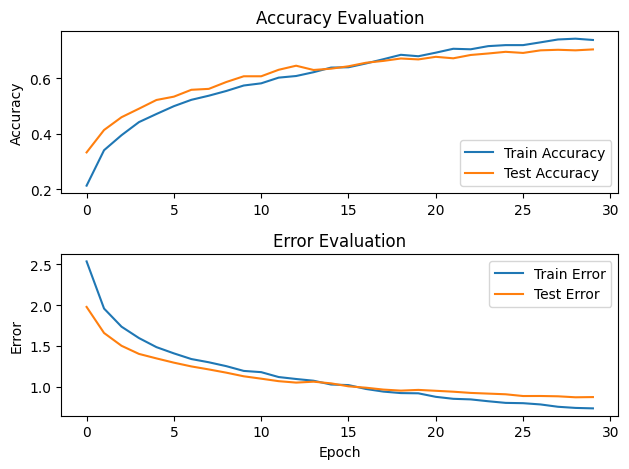

In [17]:
plot_history(cnn_history)

#### Make Predictions on Specific Sample Songs

In [18]:
# first sample song prediction
X_sample1 = X_test[100]
y_sample1 = y_test[100]

predict(model, X_sample1, y_sample1, mapping)

# second sample song prediction
X_sample2 = X_test[500]
y_sample2 = y_test[500]

predict(model, X_sample2, y_sample2, mapping)

# third sample song prediction
X_sample3 = X_test[1500]
y_sample3 = y_test[1500]

predict(model, X_sample3, y_sample3, mapping)

# forth sample song prediction
X_sample4 = X_test[2100]
y_sample4 = y_test[2100]

predict(model, X_sample4, y_sample4, mapping)

# fifth sample song prediction
X_sample5 = X_test[2450]
y_sample5 = y_test[2450]

predict(model, X_sample5, y_sample5, mapping)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Expected index: 5, Predicted index: [5]
Expected genre: classical, Predicted genre: ['classical']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Expected index: 5, Predicted index: [5]
Expected genre: classical, Predicted genre: ['classical']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Expected index: 9, Predicted index: [4]
Expected genre: jazz, Predicted genre: ['reggae']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Expected index: 4, Predicted index: [4]
Expected genre: reggae, Predicted genre: ['reggae']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Expected index: 4, Predicted index: [4]
Expected genre: reggae, Predicted genre: ['reggae']


## Conclusion
The Convolutional Neural Network performed better than the Tradional Neural Network for the task of music genre classification with MFCC inputs. Techniques of dropout and regularization were used to address overfitting.